<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/5_5_Exploring_text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Text Cleaning

## 1. About the Dataset

In [1]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.5                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.7.1)        



In [3]:
import pandas as pd
import re
#Load the dataset
df = pd.read_csv('/content/tweets.csv', encoding = 'ISO-8859-1')

In [4]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (5157, 14)


In [5]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


## 2. Generating Word Frequency

In [6]:
import spacy

In [7]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [8]:
# Combining tweets into a single string
combined_tweets=' '.join(df.text.values)

In [9]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [10]:
# Creating Doc object
doc=nlp(combined_tweets)

In [11]:
# Function for generating word frequency
def gen_freq(tokens):

    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()

    # Printing frequencies
    print(word_freq[:20])

    return word_freq

In [12]:
# Getting word frequency
word_freq=gen_freq(doc)

#                 5528
demonetization    2433
.                 2191
:                 2025
Demonetization    1887
,                 1730
to                1658
                 1642
the               1592
of                1584
RT                1369
in                1343
is                1085
on                 945
a                  816
and                711
India              662
's                 662
?                  654
-                  644
Name: count, dtype: int64


## 3. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by -

`pip install wordcloud`

In [13]:
!pip install wordcloud

In [14]:
#Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)

    # Setting Figure Size
    plt.figure(figsize=(14,12))

    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')

    # Removing all the axes
    plt.axis("off")

    plt.show()

In [16]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 16802


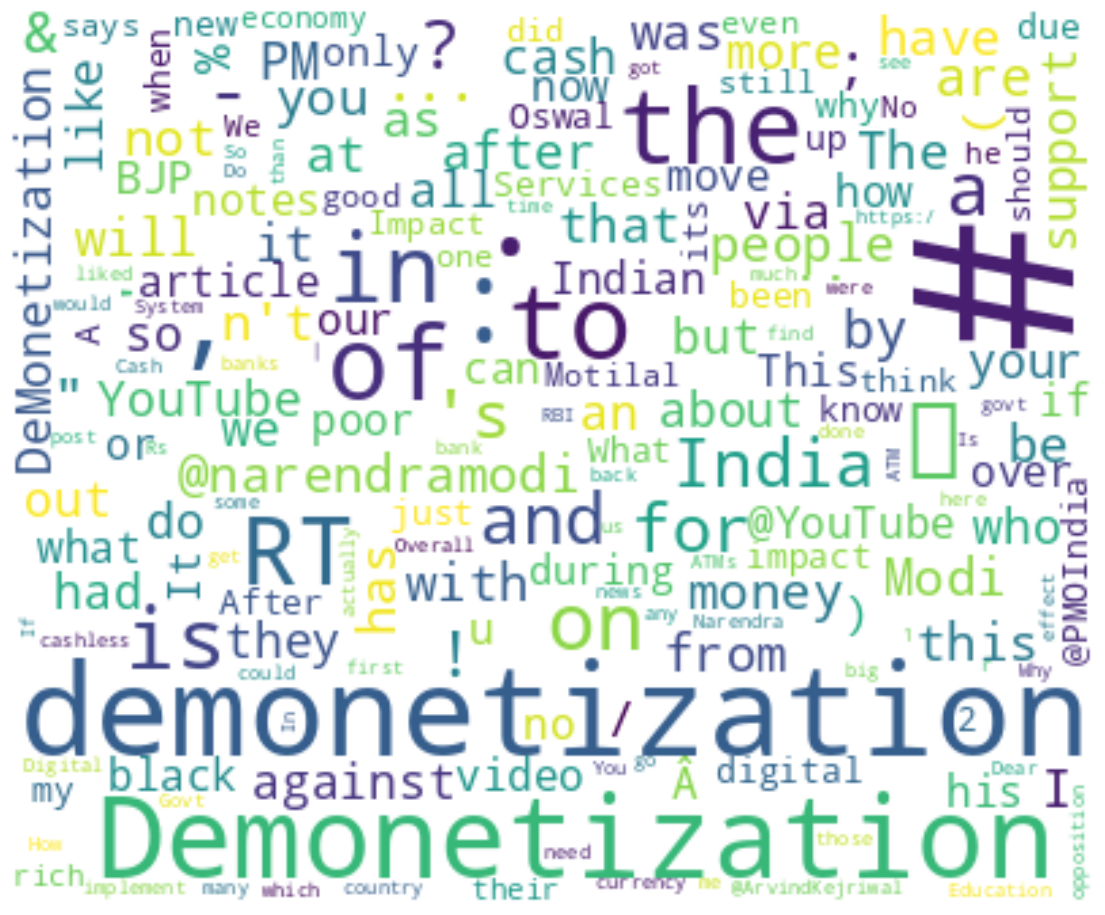

In [17]:
# Generating wordcloud
generate_wordcloud(word_freq)

## 4. Text Cleaning - Part-1

In [18]:
import re

In [19]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [20]:
# Lowercasing the text
combined_tweets=combined_tweets.lower()

In [21]:
# Creating Doc object
doc=nlp(combined_tweets)

In [22]:
# Removing stopwords and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [23]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4525
                  1672
                 1358
india              698
modi               388
money              317
@narendramodi      314
people             308
pm                 286
                  284
cash               281
youtube            248
impact             183
like               162
black              160
digital            151
support            146
@youtube           142
govt               128
u                  127
Name: count, dtype: int64


In [24]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14725


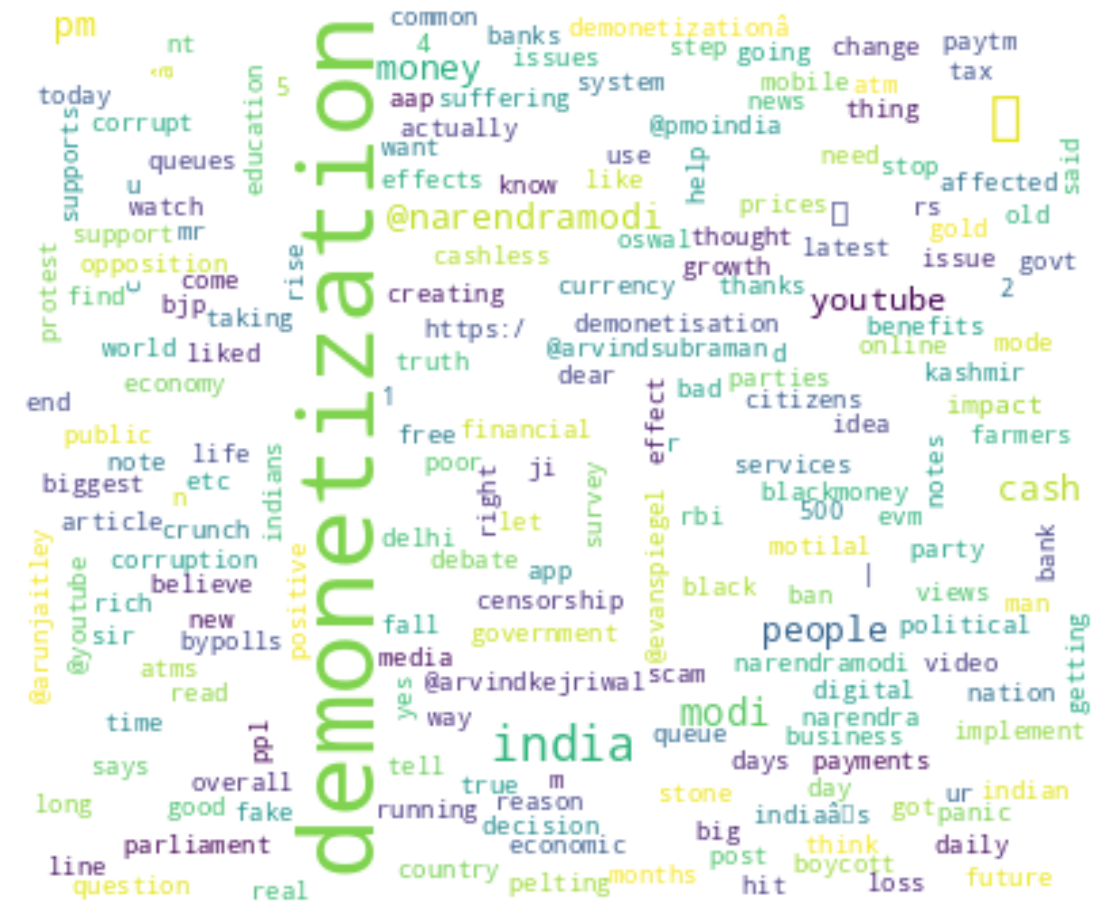

In [25]:
# Generating wordcloud
generate_wordcloud(word_freq)

## Text Cleaning - Part-2

In [26]:
# Combining tokens into a text
combined_tweets=' '.join([token.text for token in tokens])

In [27]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [28]:
# Creating Doc object
doc=nlp(combined_tweets)

In [29]:
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]

In [30]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4525
india              698
modi               388
money              318
@narendramodi      314
people             308
pm                 287
cash               281
youtube            248
impact             183
like               162
black              160
digital            151
support            146
@youtube           142
govt               128
u                  127
bjp                122
indian             119
new                118
Name: count, dtype: int64


In [31]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14713


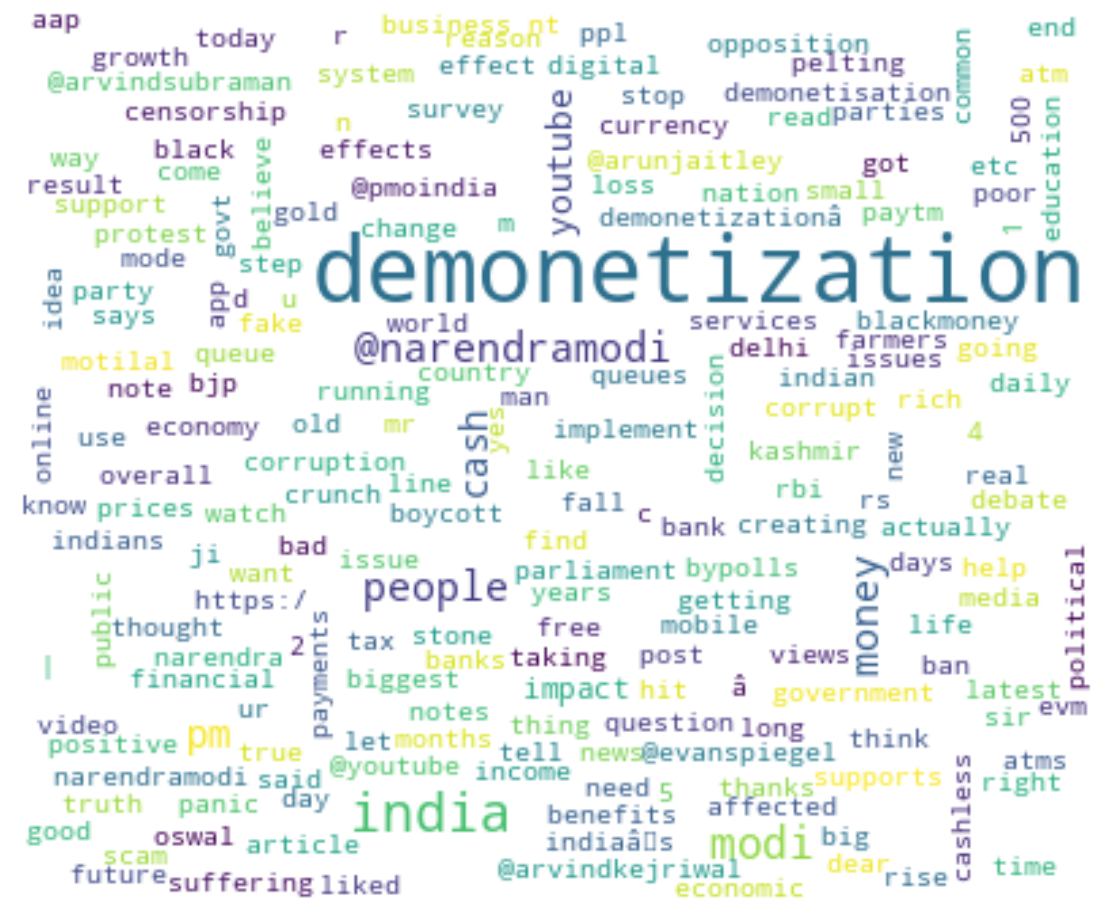

In [32]:
# Generating wordcloud
generate_wordcloud(word_freq)

In [33]:
combined_tweets=re.sub('https:/','',combined_tweets)
combined_tweets=re.sub('@', '', combined_tweets)
combined_tweets = re.sub('\d', '', combined_tweets)

In [34]:
doc = nlp(combined_tweets)

In [35]:
words = [token for token in doc]

In [36]:
word_freq = gen_freq(words)

demonetization    4557
/                 3029
/t.co             2752
                  1692
                 1349
                   850
india              699
youtube            392
modi               391
narendramodi       354
money              318
people             308
                  293
pm                 291
cash               281
impact             184
like               162
black              160
digital            151
support            146
Name: count, dtype: int64


In [37]:
len(word_freq)

14219

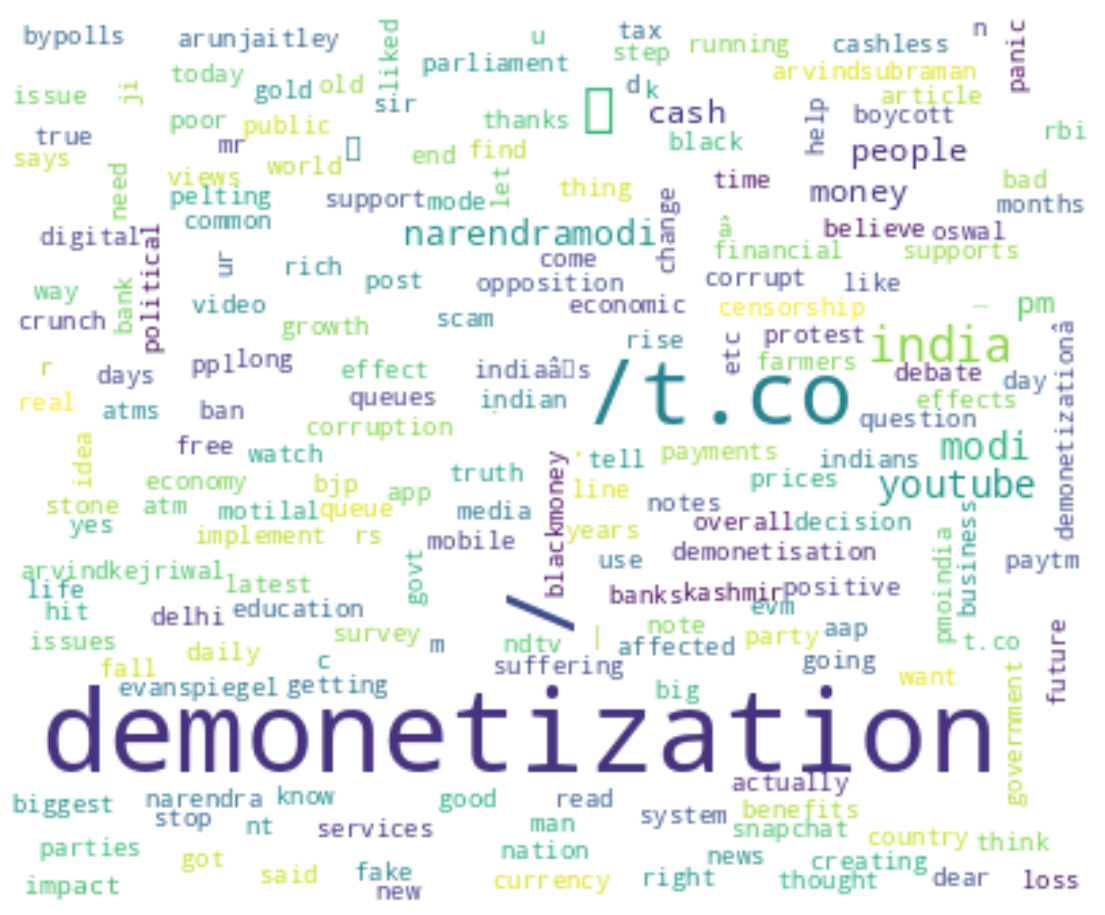

In [38]:
generate_wordcloud(word_freq)